# Data 622 - HW 4 Final Project
## Face Recognition - Application of Principal Component Analysis

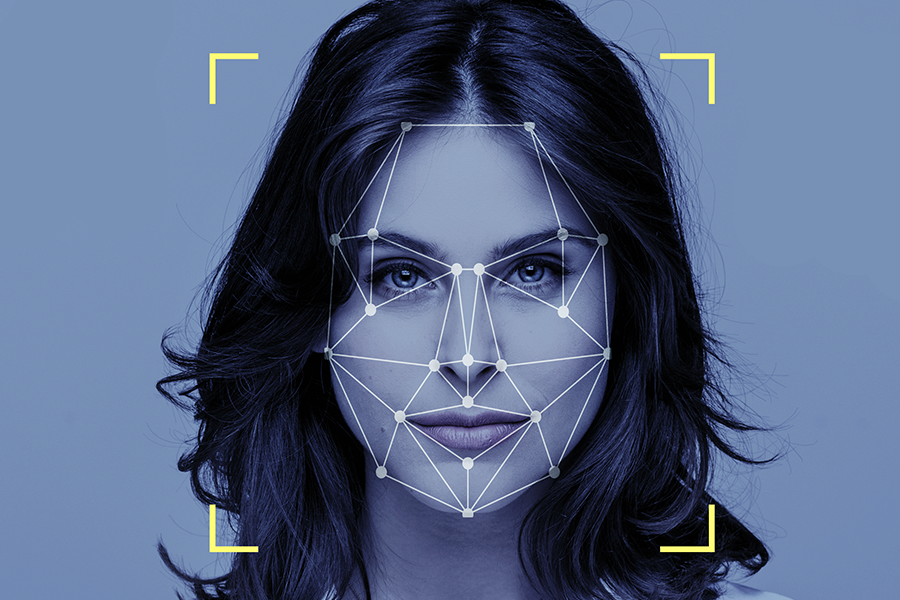

# ESSAY

One of the most important uses of machine learning is Face Recognition or in general, image recognition.  This project has the goal of applying several learned topics in ML, like Principal Component Analysis to perform face recogntion.  In this project we will use Singular Value Decomposition (SVD) to extract the Principal Components of our image matrix to perform face recognition.

The first important concept to understand is that an image is nothing more that a vector (or matrix) of integers. Each integer is a value within a scale to represent a color or shade of gray. If we have a collection of images, we could concatenate all image vectors into a single image matrix. In our case each column is a face. The rows in our matrix represent features, in this case each feature (row) is the color of a specific pixel of a face image.

**Singular Value Decomposition (SVD)** is a powerful mathematical technique that can be used for face recognition. Face recognition involves identifying or verifying the identity of an individual based on their facial features. The SVD algorithm can be used to extract the most significant features from facial images and then use them for recognition purposes.

The SVD algorithm is used to decompose a matrix into three components: the left singular vectors, the singular values, and the right singular vectors. The singular values represent the most significant features of the matrix, and they can be used to reduce the dimensionality of the data. In face recognition, the singular values represent the most important features of a face.

The left singular vectors in the SVD decomposition are what is known as **eigenfaces**. These vectors are sorted in order of importance of how much of the variance they capture from all images. Since all images can be reconstructed by the linear combination of all eigenvectors + the mean of all faces, then the weights of this linear combination becomes a unique vector of any face image projected in eigenspace. Similar faces would have similar vectors.  Similarity in linear algebra is defined as the euclidean distance of a vector to another. In this project we will select an image, find its corresponding eigenface weights.  We will compare it to all other faces and determine their respective euclidean distance. The closest one will be our match.

There are several advantages to using SVD for face recognition. First, SVD can reduce the dimensionality of the data, which makes it easier to process and compare images. Second, SVD can handle variations in lighting and pose, which are common challenges in face recognition. Finally, SVD is computationally efficient, which means that it can be used in real-time applications.

In our project we were able to achieve almost 100% accuracy matching any chosen face.  Even when we used very few Principal Components (50 to 100) we were still able to get very accurate matching results.

In conclusion, PCA is a powerful mathematical technique that can be used for face recognition. By extracting the most significant features from facial images, PCA can help identify or verify the identity of an individual based on their facial features. With its ability to handle variations in lighting and pose and its computational efficiency, PCA is a promising approach for face recognition in real-world applications.

# Project Summary and Goals

The purpose of this project is to showcase some of the theoretical concepts learned in class, specifically dimensionality reduction and its application for image recogntion.

Through the Project there will be different objetives which will be achieved:

1- Data manipulation

2- Matrix Decomposition (SVD)

3- Principal Component Analysis

4- Image display

5- Visualization of imax matrix data

6- Eigenfaces

7- Image reconstruction using Principal Components

8- Face recognition


Credit to Steven L. Brunton, J. Nathan Kutz as I used a face dataset and some of their code to manipulate and visualize the images contained in the ZIP file. Data and code provided in their book DATA DRIVEN SCIENCE & ENGINEERING


# STEPS

1- Load all image into nxm matric n=fatures (pixels) m=number of images.  this would be a tall and skinny matrix where each Image is column

2- We calculate the MEAN Face with: np.mean(facematrix, axis=1)

3- We then take the differenc of the meanface to overall face matrix. This would be a new matrix with same size and shape, that has only the differences of each image to the MEanFace

4- We derive the Eigenfaces of the differences matrix from 3 above.  We can use SVD and use U, of to a A'A and then derive Eigenvectors of this new matrix.

5- We decide how many Principal Componets we will use.

6- We isolate just 1:N_pcomp Principal Components = EigenFaces matrix

7- Eigenfaces DOT X_centered (Our centered data from above). Results is matrix size n_comps x n_images. Eesentially is a matrix which has for each of the 400 images, the weights for each of the n Principal compones

8- From the resulting weights matrix, we could take the difference to the weights of any image and then take the EUCLIDEAN Distance.

9- The shorest distance WIN!

## Load required libraries

In [1]:
# To be able to read a .ZIP file where images are stored
from zipfile import ZipFile


# For all algebraic computations needed, including SVD for PCA
import numpy as np

# For image plotting
import matplotlib.pyplot as plt

#from sklearn.decomposition import PCA

# A few other libraries for some specific tasks
import cv2
from random import randint, sample
from urllib.request import urlopen
from io import BytesIO

## Load Data

In [2]:
# I stored the .ZIP file with all images (faces) in my cloud server at www.my-cunymsds.com
resp = urlopen('http://www.my-cunymsds.com/data622/facerecog.zip')
myzip = ZipFile(BytesIO(resp.read()))

In [3]:
# Let's look at the first 20 entries of the file read
myzip.namelist()[:20]

['README',
 's1/1.pgm',
 's1/10.pgm',
 's1/2.pgm',
 's1/3.pgm',
 's1/4.pgm',
 's1/5.pgm',
 's1/6.pgm',
 's1/7.pgm',
 's1/8.pgm',
 's1/9.pgm',
 's10/1.pgm',
 's10/10.pgm',
 's10/2.pgm',
 's10/3.pgm',
 's10/4.pgm',
 's10/5.pgm',
 's10/6.pgm',
 's10/7.pgm',
 's10/8.pgm']

We can see that files is a list of image files. We will now iterate through to read them in one by one into a dictionary called "faces" 

In [4]:
faces = {}
with myzip as facezip:
    for filename in facezip.namelist():
        if not filename.endswith(".pgm"):
            continue # not a face picture
        with facezip.open(filename) as image:
            faces[filename] = cv2.imdecode(np.frombuffer(image.read(), np.uint8), cv2.IMREAD_GRAYSCALE)


In [5]:
print(len(faces))

400


We can see our "faces" list has 400 items (images)

In [6]:
list(faces.keys())[:10]

['s1/1.pgm',
 's1/10.pgm',
 's1/2.pgm',
 's1/3.pgm',
 's1/4.pgm',
 's1/5.pgm',
 's1/6.pgm',
 's1/7.pgm',
 's1/8.pgm',
 's1/9.pgm']

We can see that each key is the a filename

Let see what it is within each item (out of 400) 

In [7]:
print(faces['s1/1.pgm'].shape)
print(faces['s1/1.pgm'])

(112, 92)
[[48 49 45 ... 56 56 54]
 [45 52 39 ... 52 50 51]
 [45 50 42 ... 48 53 50]
 ...
 [50 48 50 ... 45 46 46]
 [45 54 49 ... 46 47 47]
 [51 51 51 ... 47 46 46]]


We now can see that each key-value pair, the key is an image name, and the value is 112x92 matrix. We assume is value in the matrix  is a grayscale numer 0-255 which can be plotted.


In [8]:
# Print some details
faceshape = list(faces.values())[0].shape
m = faceshape[0]
n = faceshape[1]
print("Face image shape:", faceshape)

classes = set(filename.split("/")[0] for filename in faces.keys())
print("Number of classes:", len(classes))
print("Number of images:", len(faces))

Face image shape: (112, 92)
Number of classes: 40
Number of images: 400


We can see here that we have 40 people, each with 10 different images

## Image Plotting

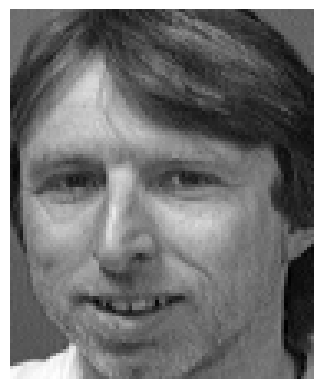

In [9]:
# Let's plot a random image
faceimages = list(faces.values())[randint(0,399)]
plt.axis("off")
plt.imshow(faceimages, cmap="gray")
plt.show()

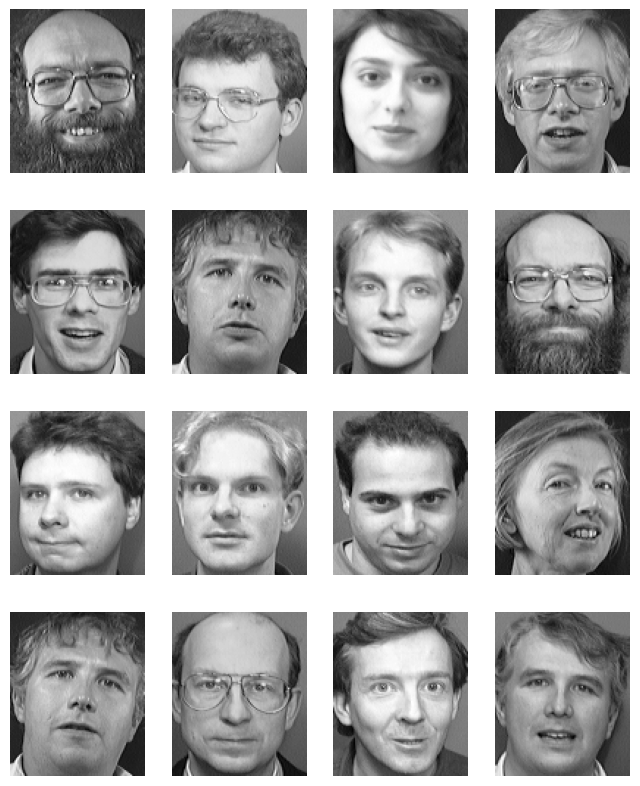

In [10]:
# Let's plot a few more (16) 

fig, axes = plt.subplots(4,4,sharex=True,sharey=True,figsize=(8,10))

randomlist = sample(range(0, 399), 16)
for i in range(16):
    axes[i%4][i//4].imshow(list(faces.values())[randomlist[i]], cmap="gray")
    axes[i%4][i//4].axis("off")

plt.show()

We can see some all imafges are different, but some of them refer to the same person. If we look at the filenames for example "s1/1.pgm" we now understand, that s1 refers to person 1, and /1 refers to the image 1 o person 1

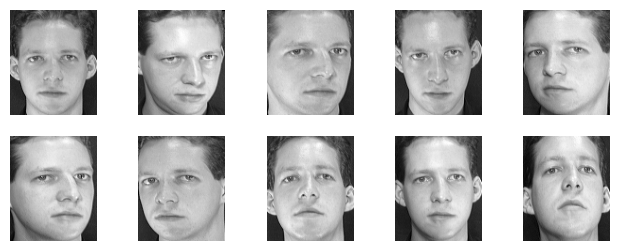

In [11]:
# Let's plot all 10 images of the 1st person

fig, axes = plt.subplots(2,5,sharex=True,sharey=True,figsize=(8,3))
faceimages = list(faces.values()) 
for i in range(10):
    axes[i//5][i%5].imshow(faceimages[i], cmap="gray")
    axes[i//5][i%5].axis("off")
plt.show()

## Principal Component Analysis

In [12]:
# Let's move all data in the dictionary to a matrix
facematrix = []
facelabel = []
for key,val in faces.items():
    facematrix.append(val.flatten())
    facelabel.append(key.split("/")[0])

facematrix = np.array(facematrix).T

In [13]:
facematrix.shape

(10304, 400)

The matrix has 10,304 rows and 400 columns.  The 10,304 rows are our features coming from the flattenning of the each image matrix of 112x92. 400 is the total of images we have (40 x 10)

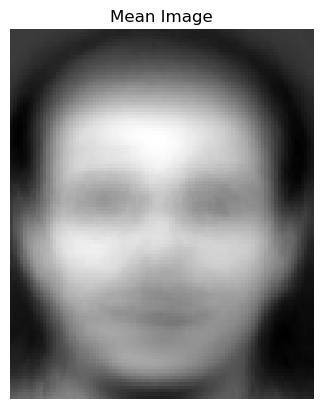

In [14]:
# The first step to do our PCA is to calculate the mean of all 400 images.
meanface = np.mean(facematrix, axis=1)

# Let's plot it
plt.imshow(meanface.reshape(faceshape), cmap="gray")
plt.title('Mean Image')
plt.axis('off')
plt.show()


The image itself lookf laking detail. That is because it is an average of all images, thus the result would be an image which shows the most basic features. For example the general shape of a face, the location of hair, eyes, nose and mouth.

In [15]:
# Lets now determined a centered matrix. That is our original matrix but susbtracting from it our meanface.
# This new matrix would only contain the difference of each image from the meanface

X_centered = facematrix - np.tile(meanface,(facematrix.shape[1],1)).T

In [16]:
X_centered.shape

(10304, 400)

We will use SVD (Singular Value Decomposition) to factorize our Centered Matrix. One of the factors (U) will have all our PRINCIPAL COMPONENTS.

In [17]:
U, S, VT = np.linalg.svd(X_centered,full_matrices=0)

In [18]:
U.shape

(10304, 400)

The Principal Components are the vectors in matrix U. These vectors are ordered in order of importance. These principal components are known as **eigenfacess**.  Essentially what eigenfaces capture are variability of all faces.  Thus any face can be reconstructed through a linea combination of the eigenfaces.  Since they are sorted by its importance, we could plot a face without having to use all 400 components. We would lose some detail, but it will come at high benefit in size.

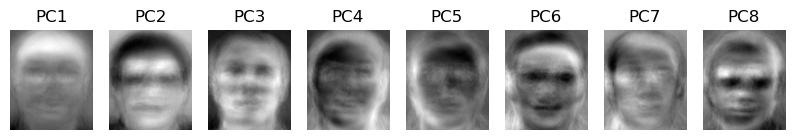

In [19]:
# Let's plot the first 8 EIGENFACES

fig, axes = plt.subplots(1,8,sharex=True,sharey=True,figsize=(10,8))

for i in range(8):
    axes[i].imshow(np.reshape(U[:,i],(m,n)), cmap="gray")
    axes[i].set_title('PC' + str(i+1))
    axes[i].axis('off')

plt.show()

Although all EIGENFACES look like blurry pictures, we will prove here that all our original images can be reconstructed by a linear combination of these eigenfaces

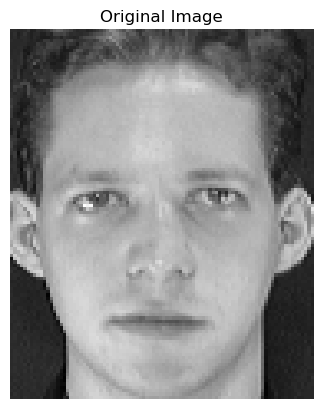

In [20]:
# Lets plot again our first image
testface = facematrix[:,0]
plt.imshow(testface.reshape(m,n), cmap="gray")
plt.title('Original Image')
plt.axis('off')
plt.show()


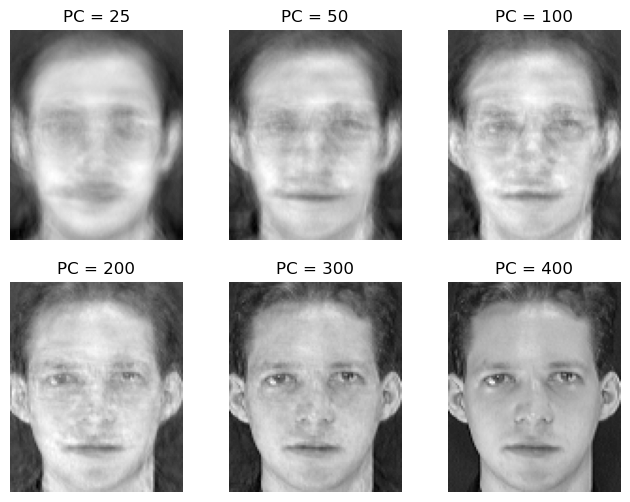

In [21]:
# We will build several faces, reconstructing the face but using fewer than the 400 possible components.
# We can compare what is the detail provided by using fewer components.

Face2Recon = testface - meanface
r_list = [25, 50, 100, 200,300,400]

fig, axes = plt.subplots(2,3,sharex=True,sharey=True,figsize=(8,6))

for i in range(6):
    reconFace = meanface + U[:,:r_list[i]]  @ U[:,:r_list[i]].T @ Face2Recon
    axes[i//3][i%3].imshow(np.reshape(reconFace,(m,n)), cmap="gray")
    axes[i//3][i%3].set_title('PC = ' + str(r_list[i]))
    axes[i//3][i%3].axis('off')

plt.show()



When we use very few components (less than 100) it is not clear who the person is. But when we get to 200 and specially 300 PC's we can clearly identify the face

## Plotting our images in projected space

For this part we will take a look a 3 PEOPLE.  We will apply dimensionality reduction to each of their 10 respectives images, and project them in 2D space.  The idea here is to check whether the people once project in 2D space can they be clearly separated.

In [22]:
# Let's define 3 people to test. 
person1 = 1
person2 = 3
person3 = 10

person1 = (person1-1) * 10
person2 = (person2-1) * 10
person3 = (person3-1) * 10

# Let's create 3 matrices, once for each person with each of their 10 images
P1 = []
for i in range(10):
    P1.append(facematrix[:,i+person1])

P1 = np.array(P1).T

P2 = []
for i in range(10):
    P2.append(facematrix[:,i+person2])

P2 = np.array(P2).T

P3 = []
for i in range(10):
    P3.append(facematrix[:,i+person3])

P3 = np.array(P3).T

We will displace the 10 images of our 3 people that will use for this test

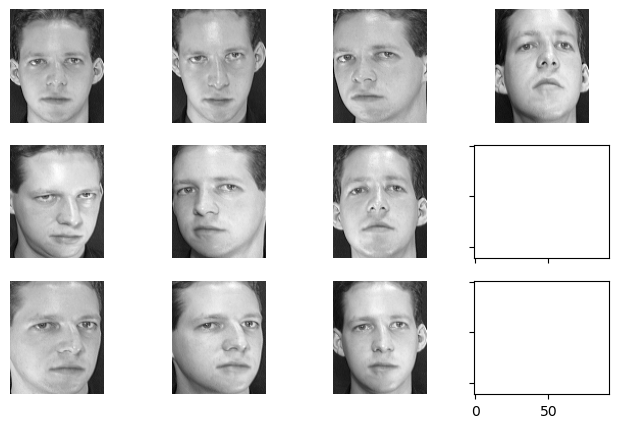

In [23]:
# Show sample faces using matplotlib
fig, axes = plt.subplots(3,4,sharex=True,sharey=True,figsize=(8,5))

for i in range(10):
    axes[i%3][i//3].imshow(P1[:,i].reshape(m,n), cmap="gray")
    axes[i%3][i//3].axis('off')

plt.show()


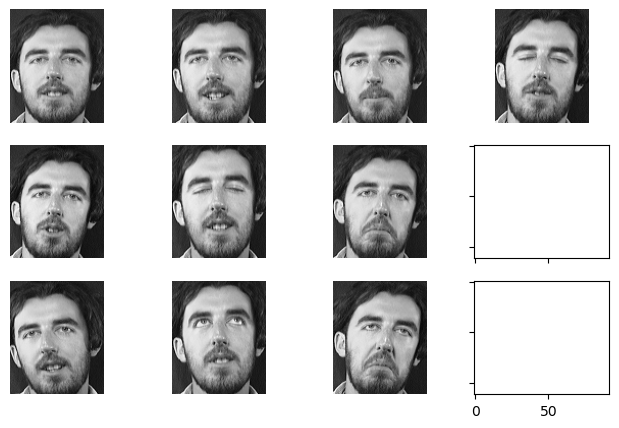

In [24]:
# Show sample faces using matplotlib
fig, axes = plt.subplots(3,4,sharex=True,sharey=True,figsize=(8,5))

for i in range(10):
    axes[i%3][i//3].imshow(P2[:,i].reshape(m,n), cmap="gray")
    axes[i%3][i//3].axis('off')

plt.show()


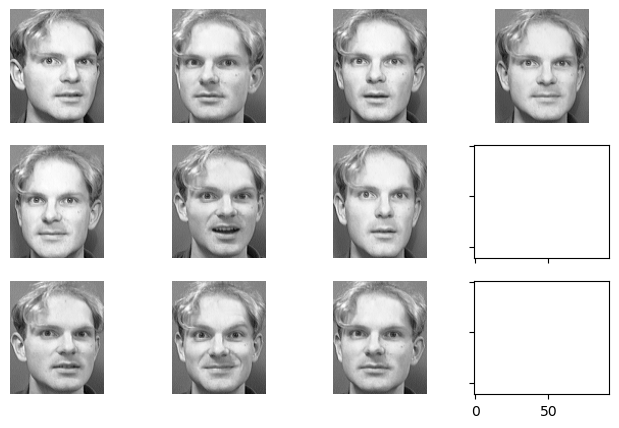

In [25]:
# Show sample faces using matplotlib
fig, axes = plt.subplots(3,4,sharex=True,sharey=True,figsize=(8,5))

for i in range(10):
    axes[i%3][i//3].imshow(P3[:,i].reshape(m,n), cmap="gray")
    axes[i%3][i//3].axis('off')
plt.show()


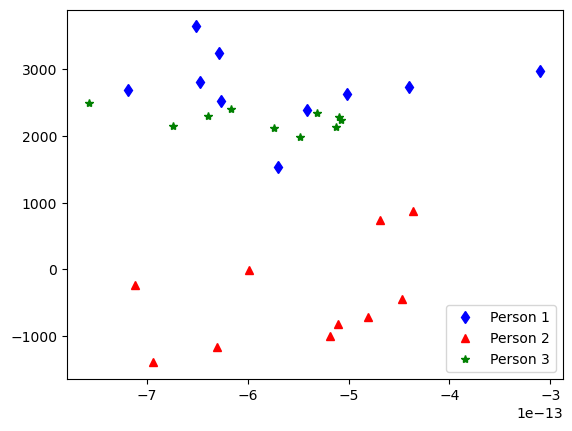

In [26]:
# Here we will project all 10 images from each of the 3 people.

f1 = P1 - np.tile(meanface,(P1.shape[1],1)).T
f2 = P2 - np.tile(meanface,(P2.shape[1],1)).T
f3 = P3 - np.tile(meanface,(P3.shape[1],1)).T

eigens2use = [0, 1] # Project onto PC's 1 and 2

P1coords = U[:,eigens2use-np.ones_like(eigens2use)].T @ f1
P2coords = U[:,eigens2use-np.ones_like(eigens2use)].T @ f2
P3coords = U[:,eigens2use-np.ones_like(eigens2use)].T @ f3

plt.plot(P1coords[0,:],P1coords[1,:],'d',c='b',label='Person 1')
plt.plot(P2coords[0,:],P2coords[1,:],'^',c='r',label='Person 2')
plt.plot(P3coords[0,:],P3coords[1,:],'*',c='g',label='Person 3')

plt.legend()
plt.show()

If we use specifically Principal Components 1 and 2, it show that Person 1 and Person 3 can't be that clearly separated. That is because the firt few principal component describe the most common characteristics, thus PC1 and PC2 are not that great to separate one person from the other.

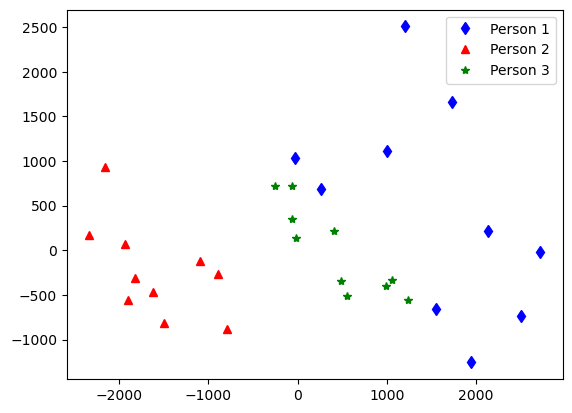

In [27]:
eigens2use = [4, 5] # Project onto PC's 5 and 6

P1coords = U[:,eigens2use-np.ones_like(eigens2use)].T @ f1
P2coords = U[:,eigens2use-np.ones_like(eigens2use)].T @ f2
P3coords = U[:,eigens2use-np.ones_like(eigens2use)].T @ f3

plt.plot(P1coords[0,:],P1coords[1,:],'d',c='b',label='Person 1')
plt.plot(P2coords[0,:],P2coords[1,:],'^',c='r',label='Person 2')
plt.plot(P3coords[0,:],P3coords[1,:],'*',c='g',label='Person 3')

plt.legend()
plt.show()

If we project using PC5 and PC6 we can see a more clear separation among all 3 people. This proves our previous statement, that people differen mostly on the smally details.

## Face Recognition

Now in the last part of our project, we will use the projected representation of each image using its principal components to get the close face image to any selected face from our dataset.  For this we will use the concept that any image can be reconstructed by the linear combination of the common eigenfaces. Thus these **weights** used for the combination of eigenfaces become a unique vector which places any face in projecte space. If we calculate the euclidean distance of alll weight vectors, we could select the closest vector to our source. 

In [28]:
# We can try here any number of component up to 400. I tried with 50 PC's and still got very good results
n_components = 300
eigenfaces = U[:,:n_components]

In [29]:
eigenfaces.shape

(10304, 300)

In [30]:
#weights = eigenfaces.T @ (facematrix.T - facematrix.T.mean(axis=0)).T
weights = eigenfaces.T @ X_centered

In [59]:
weights.shape

(300, 400)

In [31]:
# Lets test reconstructing any image using the derived above weights 
# Choose any image out of 400
facenum = 301

# Lets reconstruct
new_face = meanface + eigenfaces @ weights[:,facenum]

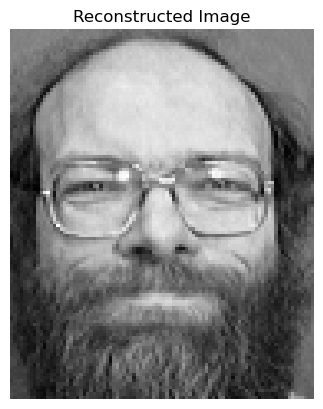

In [32]:
plt.imshow(new_face.reshape(faceshape), cmap="gray")
plt.title('Reconstructed Image')
plt.axis('off')
plt.show()


Now let's find the best match out of 400 images!

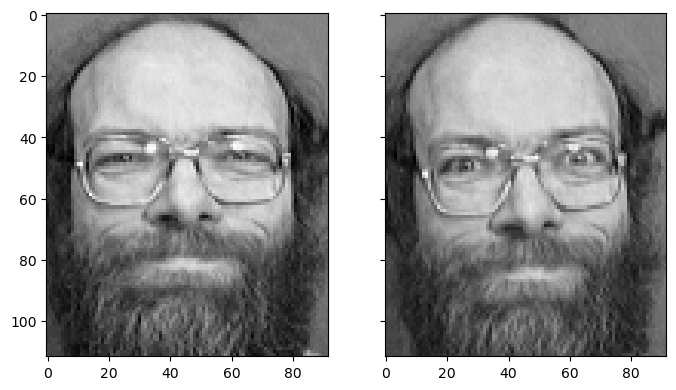

In [33]:
#test = randint(0,399)
test = facenum
euclidean_distance = np.linalg.norm(weights - weights[:,test].reshape(-1,1), axis=0)
euclidean_distance2 = euclidean_distance
euclidean_distance2[test] = 9999

best_match = np.argmin(euclidean_distance2)

source = meanface + eigenfaces @ weights[:,test]
match = meanface + eigenfaces @ weights[:,best_match]

fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,10))
axes[0].imshow(source.reshape(faceshape), cmap="gray")
axes[1].imshow(match.reshape(faceshape), cmap="gray")

plt.show()


Even if we use very few components, our search finds very accurately the best match image. Let's matching 10 random images out of our set

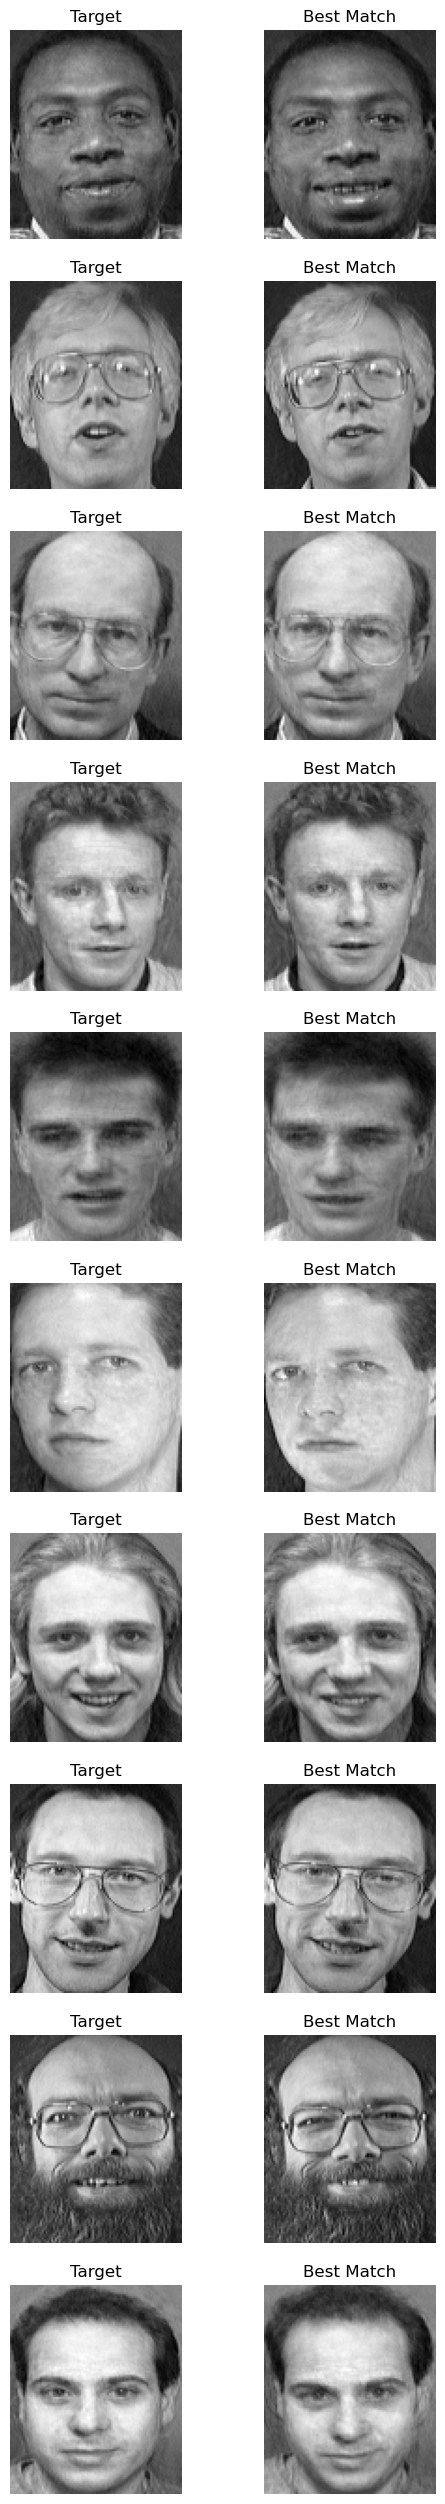

In [34]:
fig, axes = plt.subplots(10,2,sharex=True,sharey=True,figsize=(6,32))


for i in range(10):
    test = randint(0,399)
    euclidean_distance = np.linalg.norm(weights - weights[:,test].reshape(-1,1), axis=0)
    euclidean_distance2 = euclidean_distance
    euclidean_distance2[test] = 9999

    best_match = np.argmin(euclidean_distance2)

    source = meanface + eigenfaces @ weights[:,test]
    match = meanface + eigenfaces @ weights[:,best_match]

    axes[i][0].imshow(source.reshape(faceshape), cmap="gray")
    axes[i][0].set_title('Target')
    axes[i][0].axis('off')
    axes[i][1].imshow(match.reshape(faceshape), cmap="gray")
    axes[i][1].set_title('Best Match')
    axes[i][1].axis('off')

plt.show()

### Our test show excellent results matching in almost all occasions correctly the target image!

## ***********************************************************

### Test with NEW Image

In [35]:
# We read the jpg save as grayscale and has same size 112 rows x 92 colummns
juanimg = cv2.imread('juan.jpg',0) 

In [36]:
juanimg.shape

(112, 92)

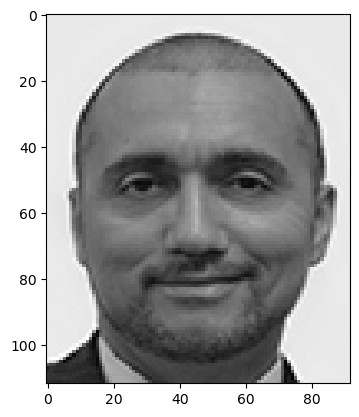

In [37]:
plt.imshow(juanimg, cmap="gray")
plt.show()

In [38]:
# We will flatten it into a single col vector
imgJuanFlat = juanimg.flatten()


In [39]:
# KEY!  We create a new vector which is just the differences of the image and MEANFACE of everyone else!
X2_centered = imgJuanFlat - meanface

# We calculate the weights of this IMAGE ONLY = ALL EigenFaces of the whole set, DOT the centerd (differences vs meanface)
weights2 = eigenfaces.T @ X2_centered

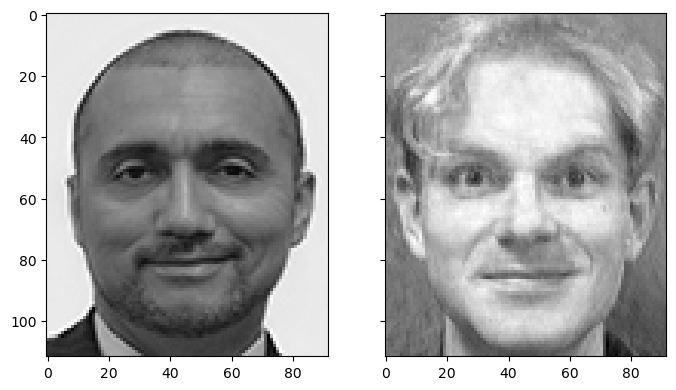

In [40]:
# Caculage the Euclidean distance of the image vector of Weights vs all other Weight Vectors
euclidean_distance = np.linalg.norm(weights - weights2.reshape(-1,1), axis=0)

# We get the index number of the lowest euclidean distance
best_match = np.argmin(euclidean_distance)

source = imgJuanFlat
#We reconstruct the TARGET image which is the one found before as ARGMIN
match = meanface + eigenfaces @ weights[:,best_match]

fig, axes = plt.subplots(1,2,sharex=True,sharey=True,figsize=(8,10))
axes[0].imshow(source.reshape(faceshape), cmap="gray")
axes[1].imshow(match.reshape(faceshape), cmap="gray")

plt.show()


In [41]:
min(euclidean_distance)

8053.606279831647

In [42]:
np.argmin(euclidean_distance)

95

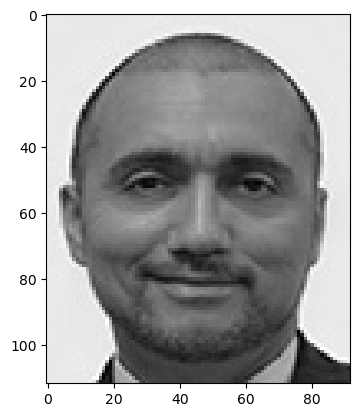

In [55]:
###########################################################
juanimg2 = cv2.imread('juan3.jpg',0)
plt.imshow(juanimg2, cmap="gray")
plt.show()

In [56]:
# This one has the lowest distance vs original Juan Image
imgJuanFlat3 = juanimg2.flatten()
X3_centered = imgJuanFlat3 - meanface
weights3 = eigenfaces.T @ X3_centered
euclidean_distance = np.linalg.norm(weights3 - weights2)
euclidean_distance

3513.841138174529

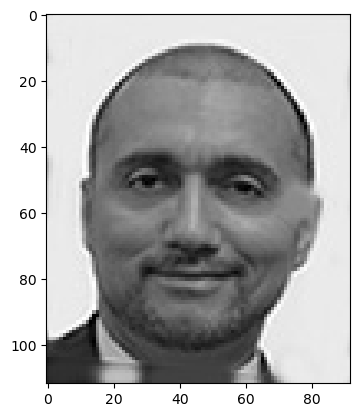

In [57]:
# This one is still very good, but just a little bit farther from SOURCE than image before
juanimg2 = cv2.imread('juan4.jpg',0)
plt.imshow(juanimg2, cmap="gray")
plt.show()

In [58]:
imgJuanFlat3 = juanimg2.flatten()
X3_centered = imgJuanFlat3 - meanface
weights3 = eigenfaces.T @ X3_centered
euclidean_distance = np.linalg.norm(weights3 - weights2)
euclidean_distance

3814.319608841364